In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px # For high-level plotting
import plotly.io as pio # For renderer settings
import kaleido
import os
import warnings
warnings.filterwarnings("ignore")

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [2]:
# merge features + target
df = pd.concat([X, y], axis=1)
# check result
print(df.head())
print(df.shape)

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  ...  Attribute12 Attribute13  \
0        A75           4        A93        A101  ...         A121          67   
1        A73           2        A92        A101  ...         A121          22   
2        A74           2        A93        A101  ...         A121          49   
3        A74           2        A93        A103  ...         A122          45   
4        A73           3        A93        A101  ...         A124          53   

   Attribute14 Attribute15 Attribute16  Attribute17 Attribute18  Attribute

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [4]:
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
df.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [6]:
df.shape

(1000, 21)

In [7]:
# Rename Attribute1..20 + target into descriptive names
df = df.rename(columns={
    "Attribute1":  "account_status",
    "Attribute2":  "duration",
    "Attribute3":  "credit_history",
    "Attribute4":  "purpose",
    "Attribute5":  "credit_amount",
    "Attribute6":  "savings",
    "Attribute7":  "employment_duration",
    "Attribute8":  "installment_rate",
    "Attribute9":  "personal_status_and_sex",
    "Attribute10": "other_debtors",
    "Attribute11": "residence_duration",
    "Attribute12": "property",
    "Attribute13": "age",
    "Attribute14": "other_installment_plans",
    "Attribute15": "housing",
    "Attribute16": "existing_credits",
    "Attribute17": "job",
    "Attribute18": "dependents",
    "Attribute19": "telephone",
    "Attribute20": "foreign_worker",
    "class":      "credit_risk"
})

In [8]:
# Define mapping dictionaries
attribute_mappings = {
    "account_status": {
        "A11": "< 0 DM", "A12": "0 <= ... < 200 DM", "A13": ">= 200 DM / salary assignment", "A14": "no checking account"
    },
    "credit_history": {
        "A30": "no credits / all paid duly", "A31": "all credits at this bank paid duly",
        "A32": "existing credits paid back duly", "A33": "delay in past payments", "A34": "critical / other credits existing"
    },
    "purpose": {
        "A40": "car (new)", "A41": "car (used)", "A42": "furniture/equipment", "A43": "radio/television",
        "A44": "domestic appliances", "A45": "repairs", "A46": "education", "A48": "retraining",
        "A49": "business", "A410": "others"
    },
    "savings": {
        "A61": "< 100 DM", "A62": "100 <= ... < 500 DM", "A63": "500 <= ... < 1000 DM", "A64": ">= 1000 DM", "A65": "unknown/no savings"
    },
    "employment_duration": {
        "A71": "unemployed", "A72": "< 1 year", "A73": "1 <= ... < 4 years", "A74": "4 <= ... < 7 years", "A75": ">= 7 years"
    },
    "personal_status_and_sex": {
        "A91": "male divorced/separated", "A92": "female divorced/separated/married",
        "A93": "male single", "A94": "male married/widowed", "A95": "female single"
    },
    "other_debtors": {
        "A101": "none", "A102": "co-applicant", "A103": "guarantor"
    },
    "property": {
        "A121": "real estate", "A122": "building society / life insurance",
        "A123": "car or other (not in savings)", "A124": "unknown/no property"
    },
    "other_installment_plans": {
        "A141": "bank", "A142": "stores", "A143": "none"
    },
    "housing": {
        "A151": "rent", "A152": "own", "A153": "for free"
    },
    "job": {
        "A171": "unemployed/unskilled - non-resident", "A172": "unskilled - resident",
        "A173": "skilled employee/official", "A174": "management/self-employed/highly qualified"
    },
    "telephone": {
        "A191": "none", "A192": "yes, registered"
    },
    "foreign_worker": {
        "A201": "yes", "A202": "no"
    }
}

In [9]:
for col, mapping in attribute_mappings.items():
    if col in df.columns:  # only apply if the column exists
        df[col] = df[col].map(mapping).fillna(df[col])  # keep values if no mapping

In [10]:
df["credit_risk"] = df["credit_risk"].astype(str).map({"1": "Good", "2": "Bad"})
df["credit_risk"] = df["credit_risk"].astype("category")

df["credit_risk"].value_counts()

credit_risk
Good    700
Bad     300
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   account_status           1000 non-null   object  
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   object  
 3   purpose                  1000 non-null   object  
 4   credit_amount            1000 non-null   int64   
 5   savings                  1000 non-null   object  
 6   employment_duration      1000 non-null   object  
 7   installment_rate         1000 non-null   int64   
 8   personal_status_and_sex  1000 non-null   object  
 9   other_debtors            1000 non-null   object  
 10  residence_duration       1000 non-null   int64   
 11  property                 1000 non-null   object  
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   object  
 14  housing  

In [12]:
df.columns

Index(['account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'employment_duration', 'installment_rate',
       'personal_status_and_sex', 'other_debtors', 'residence_duration',
       'property', 'age', 'other_installment_plans', 'housing',
       'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')

In [13]:
pd.set_option('display.max_columns', None)
df.head()

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_and_sex,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,< 0 DM,6,critical / other credits existing,radio/television,1169,unknown/no savings,>= 7 years,4,male single,none,4,real estate,67,none,own,2,skilled employee/official,1,"yes, registered",yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,none,yes,Bad
2,no checking account,12,critical / other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,male single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male single,guarantor,4,building society / life insurance,45,none,for free,1,skilled employee/official,2,none,yes,Good
4,< 0 DM,24,delay in past payments,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,none,yes,Bad


In [14]:
df.tail()

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_and_sex,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
995,no checking account,12,existing credits paid back duly,furniture/equipment,1736,< 100 DM,4 <= ... < 7 years,3,female divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good
996,< 0 DM,30,existing credits paid back duly,car (used),3857,< 100 DM,1 <= ... < 4 years,4,male divorced/separated,none,4,building society / life insurance,40,none,own,1,management/self-employed/highly qualified,1,"yes, registered",yes,Good
997,no checking account,12,existing credits paid back duly,radio/television,804,< 100 DM,>= 7 years,4,male single,none,4,car or other (not in savings),38,none,own,1,skilled employee/official,1,none,yes,Good
998,< 0 DM,45,existing credits paid back duly,radio/television,1845,< 100 DM,1 <= ... < 4 years,4,male single,none,4,unknown/no property,23,none,for free,1,skilled employee/official,1,"yes, registered",yes,Bad
999,0 <= ... < 200 DM,45,critical / other credits existing,car (used),4576,100 <= ... < 500 DM,unemployed,3,male single,none,4,car or other (not in savings),27,none,own,1,skilled employee/official,1,none,yes,Good


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_duration,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [16]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called account_status has 4 unique values
Column called duration has 33 unique values
Column called credit_history has 5 unique values
Column called purpose has 10 unique values
Column called credit_amount has 921 unique values
Column called savings has 5 unique values
Column called employment_duration has 5 unique values
Column called installment_rate has 4 unique values
Column called personal_status_and_sex has 4 unique values
Column called other_debtors has 3 unique values
Column called residence_duration has 4 unique values
Column called property has 4 unique values
Column called age has 53 unique values
Column called other_installment_plans has 3 unique values
Column called housing has 3 unique values
Column called existing_credits has 4 unique values
Column called job has 4 unique values
Column called dependents has 2 unique values
Column called telephone has 2 unique values
Column called foreign_worker has 2 unique values
Column called credit_risk has 2 unique values


--- account_status ---
account_status
no checking account              394
< 0 DM                           274
0 <= ... < 200 DM                269
>= 200 DM / salary assignment     63
Name: count, dtype: int64

--- credit_history ---
credit_history
existing credits paid back duly       530
critical / other credits existing     293
delay in past payments                 88
all credits at this bank paid duly     49
no credits / all paid duly             40
Name: count, dtype: int64

--- purpose ---
purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: count, dtype: int64

--- savings ---
savings
< 100 DM                603
unknown/no savings      183
100 <= ... < 500 DM     103
500 <= ... < 1000 DM     63
>= 1000 DM               48
Name: count, dtype: int64



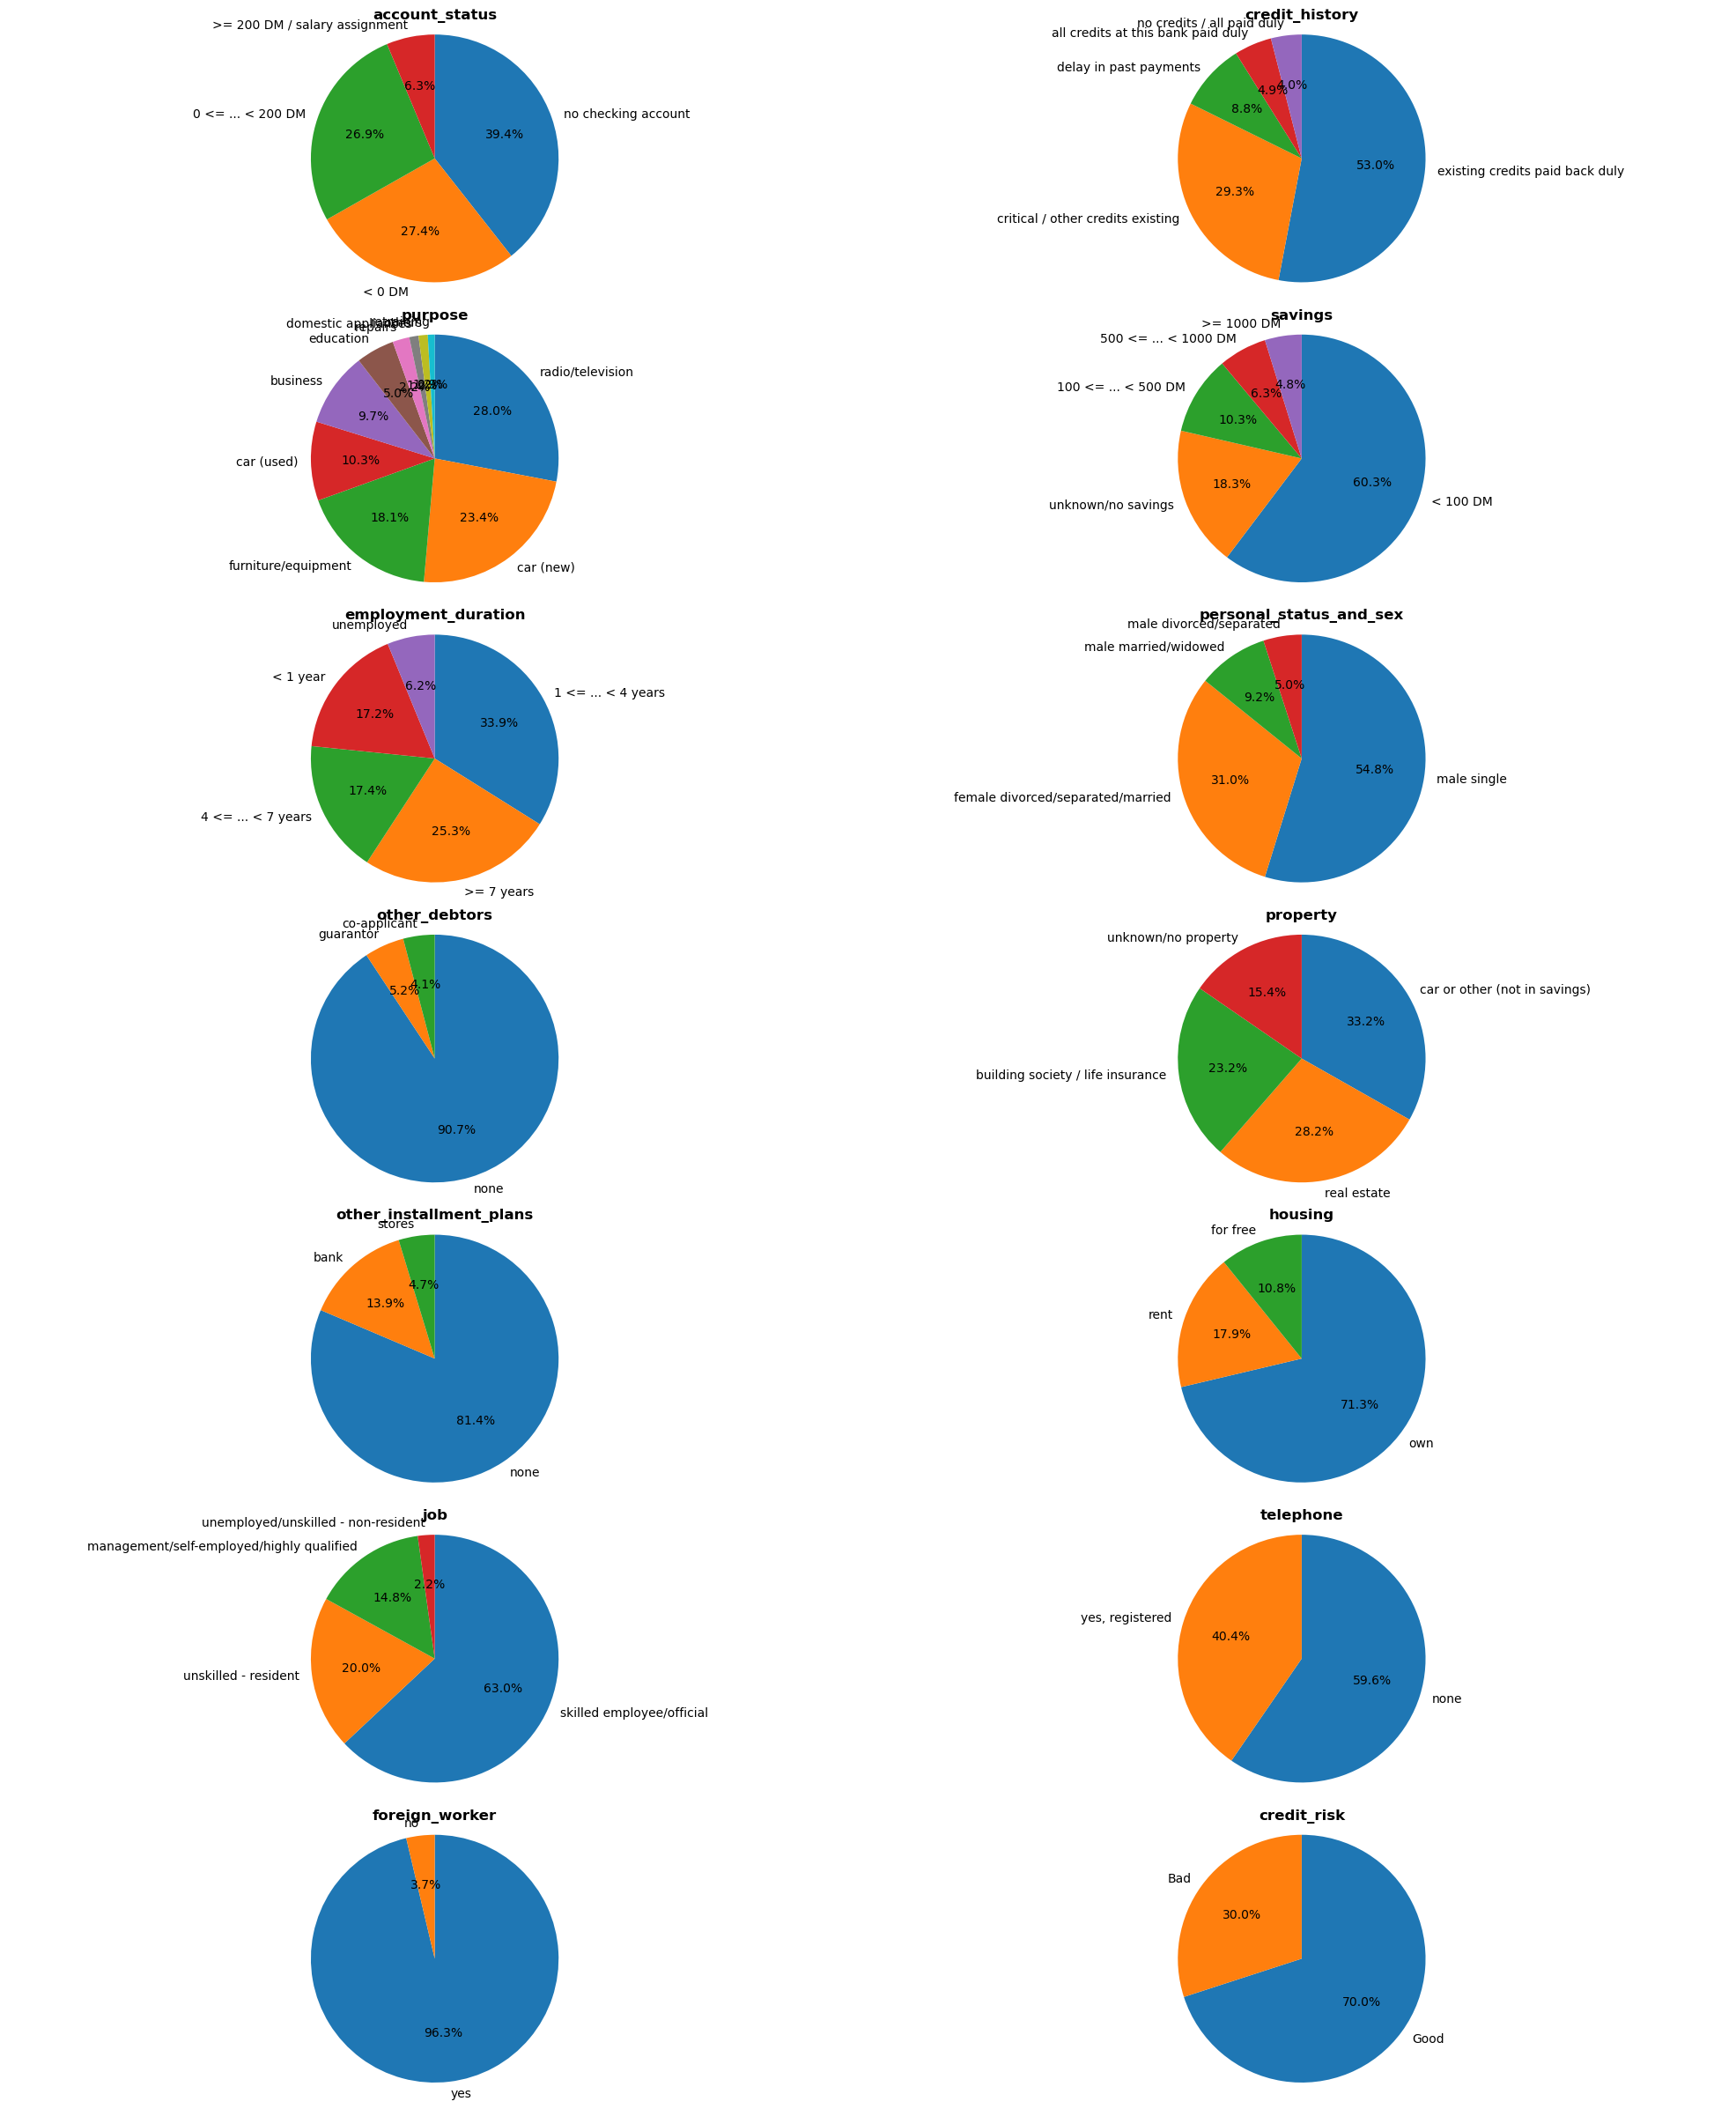

In [17]:
# List of categorical columns
columns = [
    'account_status', 'credit_history', 'purpose', 'savings', 
    'employment_duration', 'personal_status_and_sex', 'other_debtors', 
    'property', 'other_installment_plans', 'housing', 'job',
    'telephone', 'foreign_worker', 'credit_risk'
]

# Define figure and grid
plt.figure(figsize=(20, 24))  

# Loop through columns
for i, col in enumerate(columns, 1):
    count_values = df[col].value_counts(dropna=False)  # Include NaN if any
    print(f"--- {col} ---")
    print(count_values, end="\n\n")

    # Subplot arrangement: 7 rows × 2 cols (14 plots total)
    plt.subplot(7, 2, i)
    plt.title(col, fontsize=12, fontweight="bold")
    
    # Pie chart
    plt.pie(
        count_values,
        labels=count_values.index.astype(str), 
        autopct="%1.1f%%",
        startangle=90,
        counterclock=False
    )
    plt.axis("equal") 

# Adjust layout
plt.tight_layout()
plt.show()


### Data Preparation
---

#### Data Cleaning

In [18]:
df.isna().sum()

account_status             0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
employment_duration        0
installment_rate           0
personal_status_and_sex    0
other_debtors              0
residence_duration         0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   account_status           1000 non-null   object  
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   object  
 3   purpose                  1000 non-null   object  
 4   credit_amount            1000 non-null   int64   
 5   savings                  1000 non-null   object  
 6   employment_duration      1000 non-null   object  
 7   installment_rate         1000 non-null   int64   
 8   personal_status_and_sex  1000 non-null   object  
 9   other_debtors            1000 non-null   object  
 10  residence_duration       1000 non-null   int64   
 11  property                 1000 non-null   object  
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   object  
 14  housing  

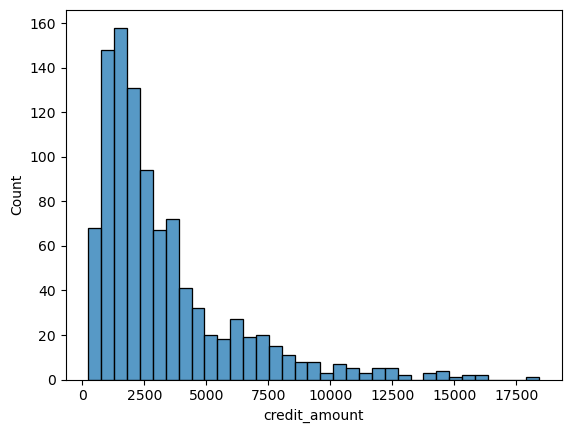

In [21]:
sns.histplot(df['credit_amount']);

In [22]:
# IQR
q1 = df['credit_amount'].quantile(0.25)
q3 = df['credit_amount'].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df['credit_amount'] < fence_low) | (df['credit_amount'] > fence_high)]

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_and_sex,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
5,no checking account,36,existing credits paid back duly,education,9055,unknown/no savings,1 <= ... < 4 years,2,male single,none,4,unknown/no property,35,none,for free,1,unskilled - resident,2,"yes, registered",yes,Good
17,< 0 DM,30,no credits / all paid duly,business,8072,unknown/no savings,< 1 year,2,male single,none,3,car or other (not in savings),25,bank,own,3,skilled employee/official,1,none,yes,Good
18,0 <= ... < 200 DM,24,existing credits paid back duly,car (used),12579,< 100 DM,>= 7 years,4,female divorced/separated/married,none,2,unknown/no property,44,none,for free,1,management/self-employed/highly qualified,1,"yes, registered",yes,Bad
57,no checking account,36,critical / other credits existing,radio/television,9566,< 100 DM,1 <= ... < 4 years,2,female divorced/separated/married,none,2,car or other (not in savings),31,stores,own,2,skilled employee/official,1,none,yes,Good
63,0 <= ... < 200 DM,48,no credits / all paid duly,business,14421,< 100 DM,1 <= ... < 4 years,2,male single,none,2,car or other (not in savings),25,none,own,1,skilled employee/official,1,"yes, registered",yes,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,< 0 DM,48,existing credits paid back duly,car (used),10297,< 100 DM,4 <= ... < 7 years,4,male single,none,4,unknown/no property,39,stores,for free,3,skilled employee/official,2,"yes, registered",yes,Bad
945,0 <= ... < 200 DM,48,no credits / all paid duly,car (new),8358,500 <= ... < 1000 DM,< 1 year,1,female divorced/separated/married,none,1,car or other (not in savings),30,none,own,2,skilled employee/official,1,none,yes,Good
953,no checking account,36,existing credits paid back duly,furniture/equipment,10974,< 100 DM,unemployed,4,female divorced/separated/married,none,2,car or other (not in savings),26,none,own,2,management/self-employed/highly qualified,1,"yes, registered",yes,Bad
980,0 <= ... < 200 DM,30,critical / other credits existing,furniture/equipment,8386,< 100 DM,4 <= ... < 7 years,2,male single,none,2,building society / life insurance,49,none,own,1,skilled employee/official,1,none,yes,Bad


In [23]:
# Handle outliers
# Using IQR
df_clean = df.loc[(df['credit_amount'] >= fence_low) & (df['credit_amount'] <= fence_high)]

df_clean

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_and_sex,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,< 0 DM,6,critical / other credits existing,radio/television,1169,unknown/no savings,>= 7 years,4,male single,none,4,real estate,67,none,own,2,skilled employee/official,1,"yes, registered",yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,none,yes,Bad
2,no checking account,12,critical / other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,male single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male single,guarantor,4,building society / life insurance,45,none,for free,1,skilled employee/official,2,none,yes,Good
4,< 0 DM,24,delay in past payments,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,none,yes,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly,furniture/equipment,1736,< 100 DM,4 <= ... < 7 years,3,female divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good
996,< 0 DM,30,existing credits paid back duly,car (used),3857,< 100 DM,1 <= ... < 4 years,4,male divorced/separated,none,4,building society / life insurance,40,none,own,1,management/self-employed/highly qualified,1,"yes, registered",yes,Good
997,no checking account,12,existing credits paid back duly,radio/television,804,< 100 DM,>= 7 years,4,male single,none,4,car or other (not in savings),38,none,own,1,skilled employee/official,1,none,yes,Good
998,< 0 DM,45,existing credits paid back duly,radio/television,1845,< 100 DM,1 <= ... < 4 years,4,male single,none,4,unknown/no property,23,none,for free,1,skilled employee/official,1,"yes, registered",yes,Bad


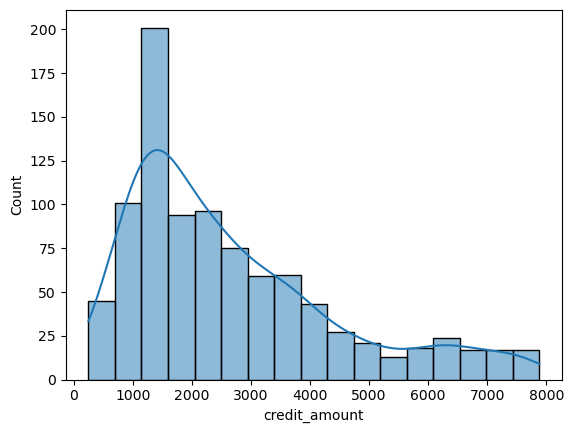

In [24]:
sns.histplot(df_clean['credit_amount'], kde=True);

#### Feature Engineering

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   account_status           928 non-null    object  
 1   duration                 928 non-null    int64   
 2   credit_history           928 non-null    object  
 3   purpose                  928 non-null    object  
 4   credit_amount            928 non-null    int64   
 5   savings                  928 non-null    object  
 6   employment_duration      928 non-null    object  
 7   installment_rate         928 non-null    int64   
 8   personal_status_and_sex  928 non-null    object  
 9   other_debtors            928 non-null    object  
 10  residence_duration       928 non-null    int64   
 11  property                 928 non-null    object  
 12  age                      928 non-null    int64   
 13  other_installment_plans  928 non-null    object  
 14  housing        

In [26]:
# Feature Engineering

# --- Installment Burden (Loan per Month) ---
df_clean['loan_per_month'] = df_clean['credit_amount'] / df_clean['duration'] # Captures how heavy the monthly installment is relative to loan size & term
        
# --- Loan-to-Age Ratio ---
df_clean['loan_to_age_ratio'] = df_clean['credit_amount'] / df_clean['age'] # Younger customers with large loans may be riskier.
        
# --- Employment Stability Indicator ---
df_clean['long_employed'] = (df_clean['employment_duration'].isin([">= 7 years", "4 <= ... < 7 years"])).astype(int) # Applicants with longer employment are generally safer.
        
# --- Savings & Checking Risk Flags ---
df_clean['low_savings_flag'] = (df_clean['savings'].isin(['< 0 DM', 'unknown/no savings'])).astype(int)
df_clean['low_checking_flag'] = (df_clean['account_status'].isin(['< 0 DM', '0 <= ... < 200 DM', 'no checking account'])).astype(int) # Missing/low balances → higher risk.
        
# --- Credit Amount Risk Buckets ---
df_clean['loan_size_bucket'] = pd.cut(df_clean['credit_amount'], bins=[0, 1000, 3000, 6000, 20000], labels=['Very Small', 'Small', 'Medium', 'Large']) # Bin credit amounts into categories (like credit scorecards do).
        
# --- Purpose Risk Indicator ---
risky_purposes = ['radio/TV', 'furniture/equipment']
df_clean['purpose_risky_flag'] = df_clean['purpose'].isin(risky_purposes).astype(int) # Some purposes historically riskier than others.
        
# --- Debt-to-Employment Ratio ---
emp_map = {
            "unemployed": 0,
            "< 1 year": 1,
            "1 <= ... < 4 years": 3,
            "4 <= ... < 7 years": 5,
            ">= 7 years": 8
        }
df_clean['emp_years'] = df_clean['employment_duration'].map(emp_map)
df_clean['debt_to_employment'] = df_clean['credit_amount'] / (df_clean['emp_years'] + 1) # Large loans with short employment history → riskier.
        
# --- Has Telephone Flag ---
df_clean['has_phone'] = (df_clean['telephone'] == 'yes, registered').astype(int) # Proxy for stability in dataset.
        
# --- Housing Ownership Flag ---
df_clean['is_homeowner'] = (df_clean['housing'] == 'own').astype(int) # Homeowners are generally safer borrowers.


In [27]:
df_clean.head()

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_and_sex,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk,loan_per_month,loan_to_age_ratio,long_employed,low_savings_flag,low_checking_flag,loan_size_bucket,purpose_risky_flag,emp_years,debt_to_employment,has_phone,is_homeowner
0,< 0 DM,6,critical / other credits existing,radio/television,1169,unknown/no savings,>= 7 years,4,male single,none,4,real estate,67,none,own,2,skilled employee/official,1,"yes, registered",yes,Good,194.833333,17.447761,1,1,1,Small,0,8,129.888889,1,1
1,0 <= ... < 200 DM,48,existing credits paid back duly,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,none,yes,Bad,123.979167,270.500000,0,0,1,Medium,0,3,1487.750000,0,1
2,no checking account,12,critical / other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,male single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good,174.666667,42.775510,1,0,1,Small,0,5,349.333333,0,1
3,< 0 DM,42,existing credits paid back duly,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male single,guarantor,4,building society / life insurance,45,none,for free,1,skilled employee/official,2,none,yes,Good,187.666667,175.155556,1,0,1,Large,1,5,1313.666667,0,0
4,< 0 DM,24,delay in past payments,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,none,yes,Bad,202.916667,91.886792,0,0,1,Medium,0,3,1217.500000,0,0


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   account_status           928 non-null    object  
 1   duration                 928 non-null    int64   
 2   credit_history           928 non-null    object  
 3   purpose                  928 non-null    object  
 4   credit_amount            928 non-null    int64   
 5   savings                  928 non-null    object  
 6   employment_duration      928 non-null    object  
 7   installment_rate         928 non-null    int64   
 8   personal_status_and_sex  928 non-null    object  
 9   other_debtors            928 non-null    object  
 10  residence_duration       928 non-null    int64   
 11  property                 928 non-null    object  
 12  age                      928 non-null    int64   
 13  other_installment_plans  928 non-null    object  
 14  housing        

In [29]:
df_clean.isna().sum()

account_status             0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
employment_duration        0
installment_rate           0
personal_status_and_sex    0
other_debtors              0
residence_duration         0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
credit_risk                0
loan_per_month             0
loan_to_age_ratio          0
long_employed              0
low_savings_flag           0
low_checking_flag          0
loan_size_bucket           0
purpose_risky_flag         0
emp_years                  0
debt_to_employment         0
has_phone                  0
is_homeowner               0
dtype: int64

### Exploratory Data Analysis (EDA)
---

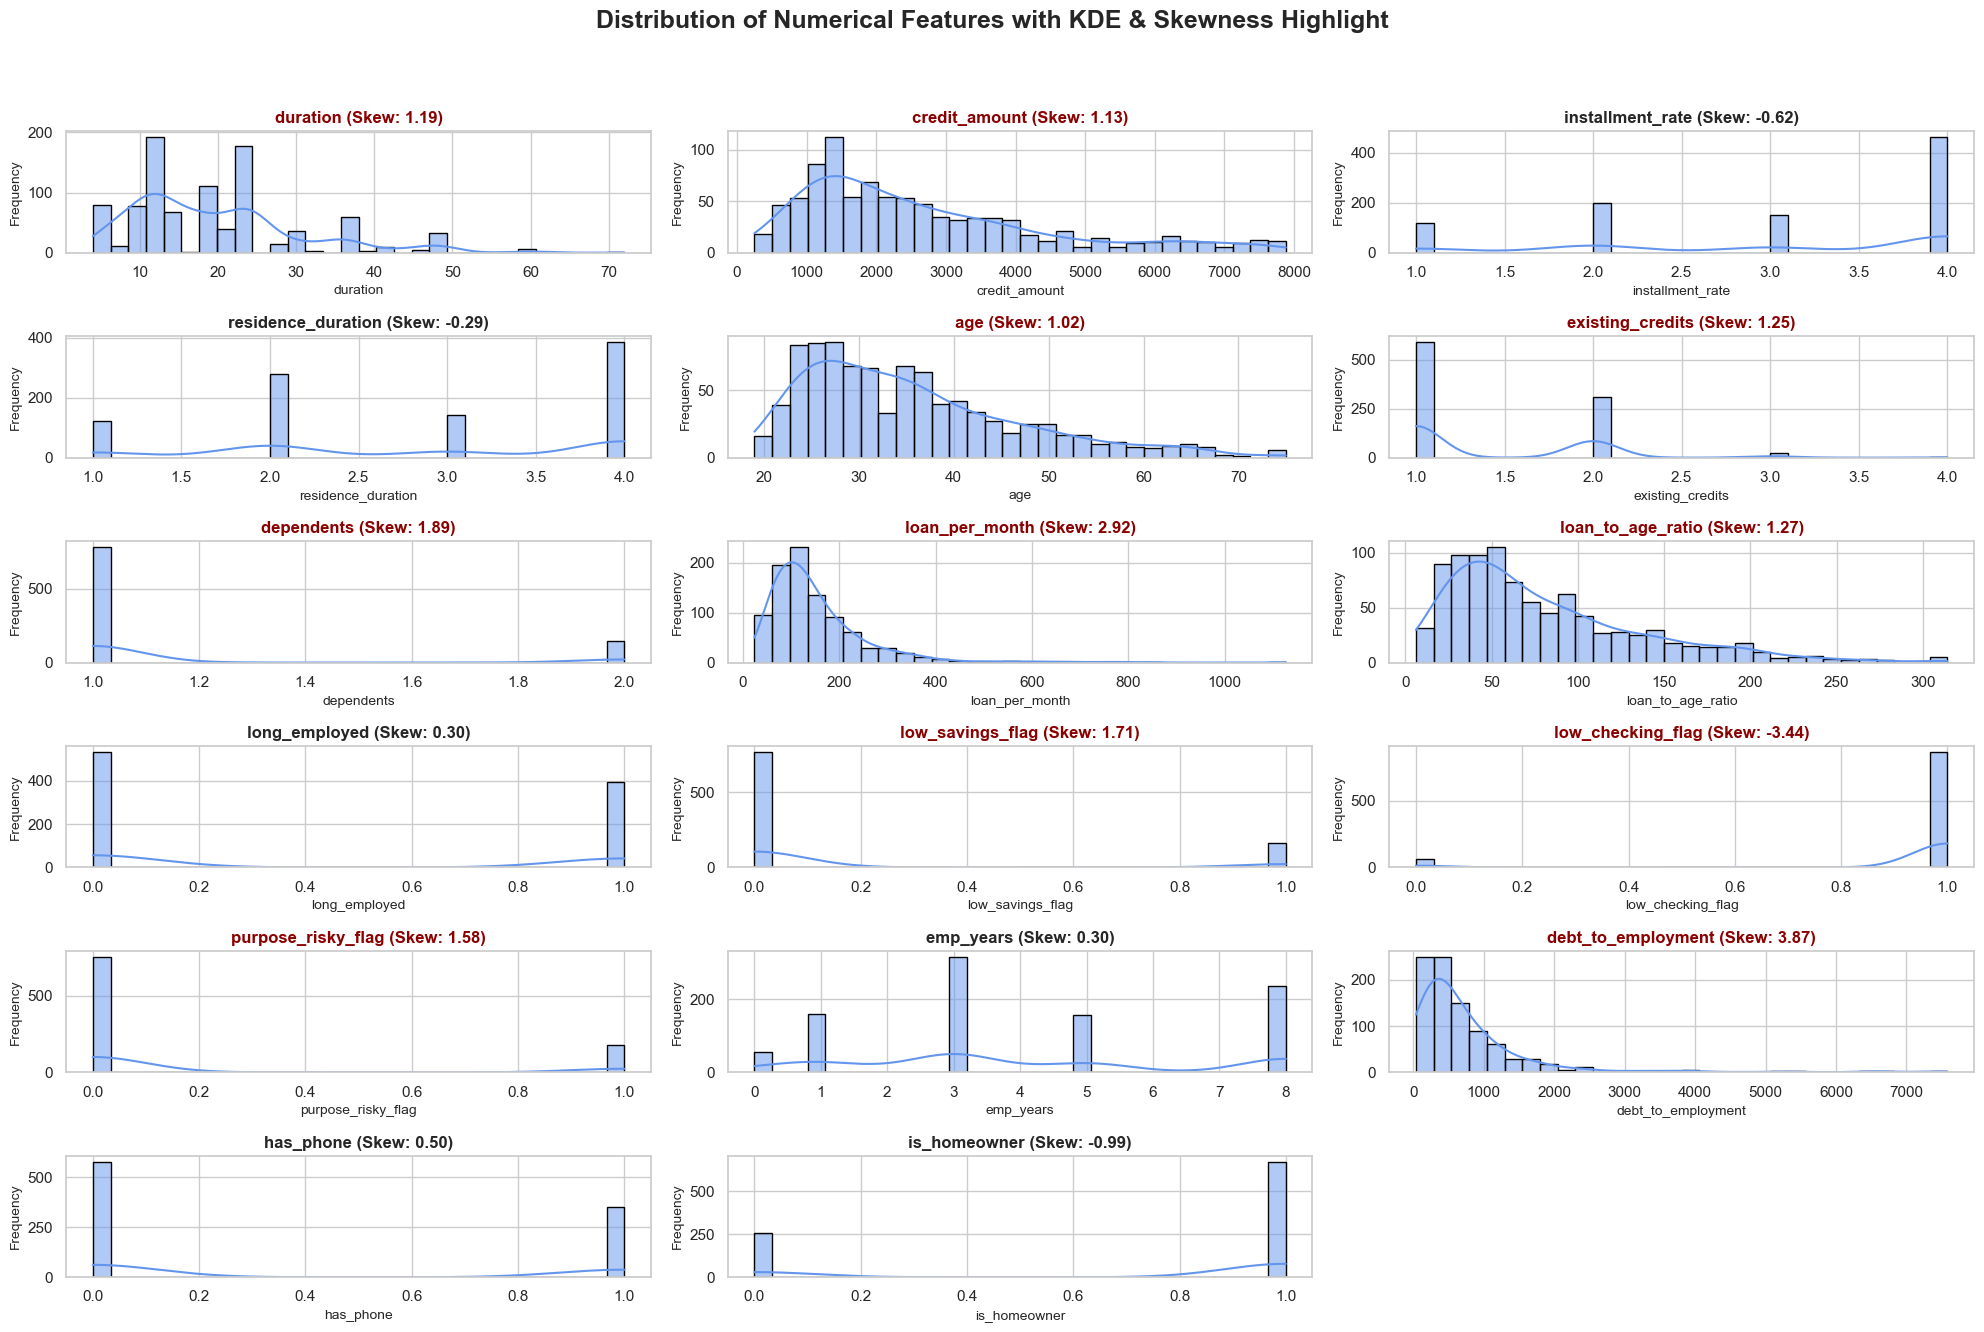

In [30]:
#  Feature Distributions

from scipy.stats import skew, uniform, randint, loguniform

# Set seaborn style for clean visuals
sns.set(style="whitegrid")

# Select only numeric features
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for each feature
skewness = df_clean[num_cols].apply(skew).sort_values(ascending=False)

# Set plot layout
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14))
axes = axes.flatten()

# Plot histograms with KDE overlay and skewness info
for i, col in enumerate(num_cols):
    sns.histplot(df_clean[col], bins=30, kde=True, color='cornflowerblue', edgecolor='black', ax=axes[i])

    skew_val = skewness[col]
    skew_label = f" (Skew: {skew_val:.2f})"

    # Highlight skewed features with a red title
    if abs(skew_val) > 1:
        axes[i].set_title(f"{col}{skew_label}", fontsize=12, fontweight='bold', color='darkred')
    else:
        axes[i].set_title(f"{col}{skew_label}", fontsize=12, fontweight='bold')

    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global title
fig.suptitle('Distribution of Numerical Features with KDE & Skewness Highlight', 
             fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


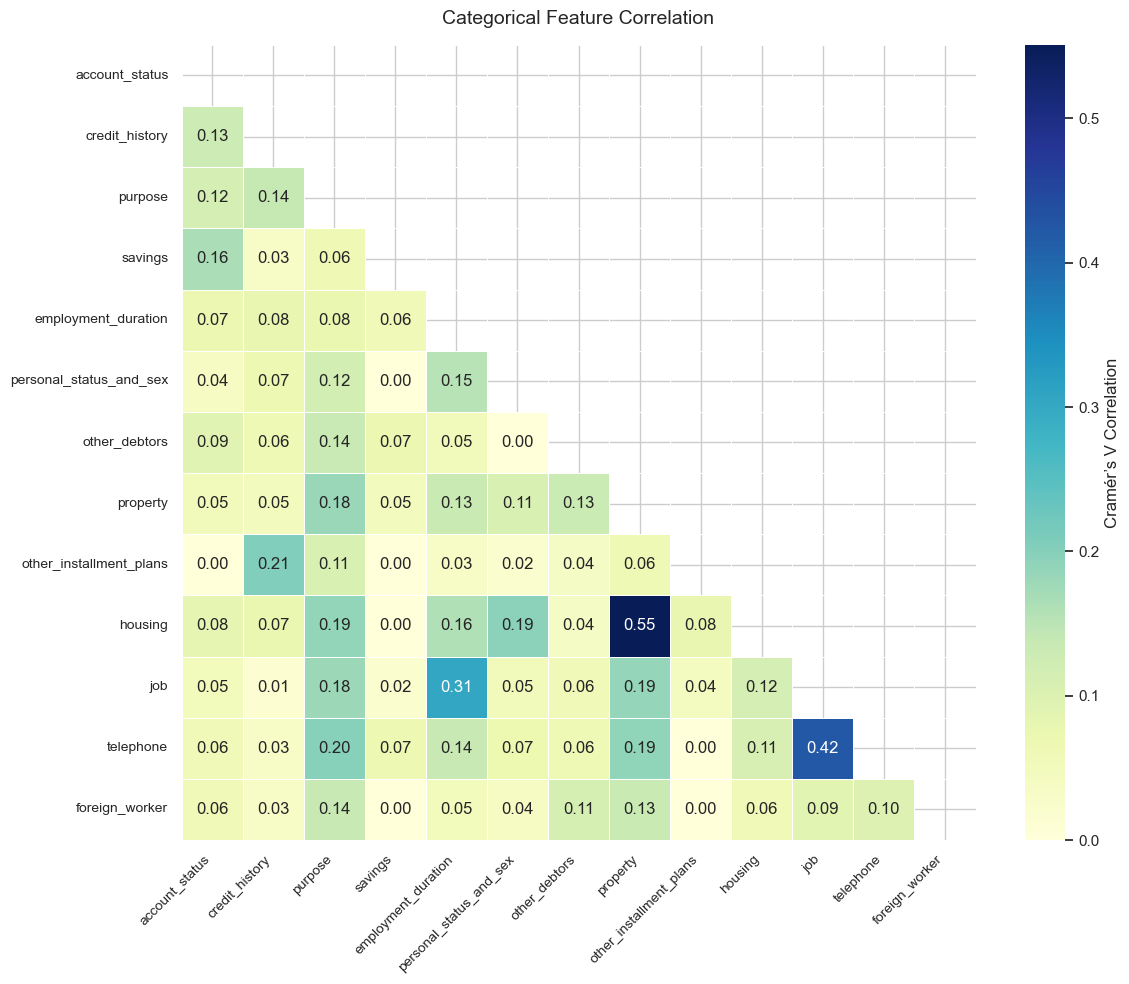

In [31]:
# Caterogical Feature
from scipy.stats import chi2_contingency

# Select categorical and binary features
cat_cols = df_clean.select_dtypes(include=['object']).columns


# Function to compute Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))    
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Build correlation matrix for categorical features
cramers_results = pd.DataFrame(
    np.zeros((len(cat_cols), len(cat_cols))),
    index=cat_cols,
    columns=cat_cols
)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Mask upper triangle (since symmetric)
mask = np.triu(np.ones_like(cramers_results, dtype=bool))

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    cramers_results, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    mask=mask, 
    linewidths=0.5, 
    cbar_kws={'label': "Cramér’s V Correlation"}
)
plt.title("Categorical Feature Correlation", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [32]:
num_cols

Index(['duration', 'credit_amount', 'installment_rate', 'residence_duration',
       'age', 'existing_credits', 'dependents', 'loan_per_month',
       'loan_to_age_ratio', 'long_employed', 'low_savings_flag',
       'low_checking_flag', 'purpose_risky_flag', 'emp_years',
       'debt_to_employment', 'has_phone', 'is_homeowner'],
      dtype='object')

In [33]:
cat_cols 

Index(['account_status', 'credit_history', 'purpose', 'savings',
       'employment_duration', 'personal_status_and_sex', 'other_debtors',
       'property', 'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

### Model Building & Evaluation
---

#### Train/Test Split

In [34]:
y = df_clean["credit_risk"].map({"Good": "1", "Bad": "0"})

X = df_clean.drop(columns = ["credit_risk", "loan_size_bucket"])

In [35]:
# Preprocessor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

#### Models

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Candidate models
models = {
    "log_reg": LogisticRegression(max_iter=1000, random_state=42),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42)
}

# Example param grids (note the 'model__' prefix)
param_grid = {
    "log_reg": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "model__class_weight": [None, "balanced"]
    },
    "decision_tree": {
        "model__max_depth": [3, 5, 10, None],
        "model__min_samples_split": [2, 5, 10],
        "model__class_weight": [None, "balanced"]
    },
    "random_forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [5, 10, None],
        "model__min_samples_split": [2, 5, 10],
        "model__class_weight": [None, "balanced"]
    }
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

best_models = {}

for name, model in models.items():
    print(f"\n🔎 Tuning {name}...")
    pipe = Pipeline(steps=[("preprocess", preprocessor),
                           ("model", model)])
    
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid[name],
        cv=5,
        scoring="roc_auc",
        n_jobs=-1,
        error_score='raise'
    )
    
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print(f"Best ROC-AUC ({name}): {grid.best_score_:.4f}")
    print("Best Params:", grid.best_params_)



🔎 Tuning log_reg...
Best ROC-AUC (log_reg): 0.7864
Best Params: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l2'}

🔎 Tuning decision_tree...
Best ROC-AUC (decision_tree): 0.7261
Best Params: {'model__class_weight': 'balanced', 'model__max_depth': 3, 'model__min_samples_split': 2}

🔎 Tuning random_forest...
Best ROC-AUC (random_forest): 0.8089
Best Params: {'model__class_weight': 'balanced', 'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}


In [37]:
# Select best model
best_model_name = max(best_models, key=lambda k: best_models[k].best_score_)
best_model = best_models[best_model_name]
print(f"\n🏆 Best model: {best_model_name} with ROC-AUC = {best_model.best_score_:.4f}")


🏆 Best model: random_forest with ROC-AUC = 0.8089


#### Business Metrics

In [38]:
# Business Metrics

y_proba = best_model.predict_proba(X_test)[:, 1]

y_test = y_test.astype(int)
y_proba = y_proba.astype(float)

# Example threshold (can tune this)
threshold = 0.1
y_pred = (y_proba >= threshold).astype(int)

# Acceptance = % predicted good
acceptance_rate = (y_pred == 1).mean()

# Default Rate = among accepted, how many are actually bad
accepted_idx = np.where(y_pred == 1)[0]
default_rate = (y_test.iloc[accepted_idx] == 0).mean()

# Profitability (simplified):
# Assume revenue = 1000 per good loan, loss = -2000 per bad loan
profit_per_good = 1000
loss_per_bad = -2000

profit = (
    (y_test.iloc[accepted_idx] == 1).sum() * profit_per_good +
    (y_test.iloc[accepted_idx] == 0).sum() * loss_per_bad
)

# Loss Rate = losses / total disbursed
total_disbursed = len(accepted_idx)
loss_rate = ((y_test.iloc[accepted_idx] == 0).sum() * abs(loss_per_bad)) / (
    total_disbursed * profit_per_good
)

print("\n📊 Business Metrics (Corrected):")
print(f"Acceptance Rate: {acceptance_rate:.2%}")
print(f"Default Rate (DPD): {default_rate:.2%}")
print(f"Profitability: {profit}")
print(f"Loss Rate: {loss_rate:.2%}")


📊 Business Metrics (Corrected):
Acceptance Rate: 100.00%
Default Rate (DPD): 27.96%
Profitability: 30000
Loss Rate: 55.91%


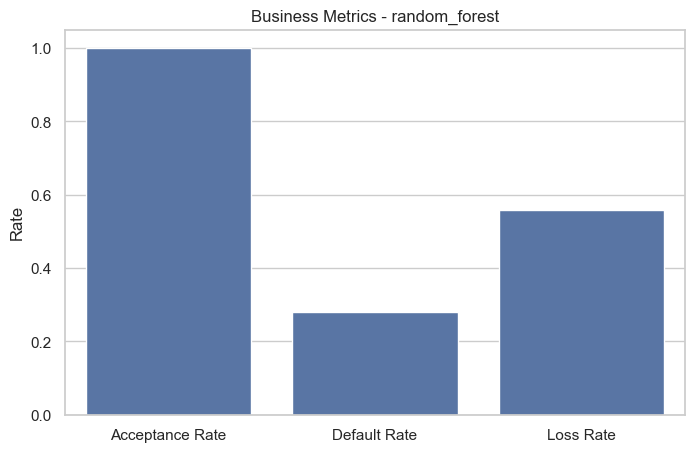

In [39]:
metrics = {
    "Acceptance Rate": acceptance_rate,
    "Default Rate": default_rate,
    "Loss Rate": loss_rate
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title(f"Business Metrics - {best_model_name}")
plt.ylabel("Rate")
plt.show()

In [40]:
# Threshold Optimization

thresholds = np.arange(0.1, 0.91, 0.05)

results = []
for thr in thresholds:
    y_pred = (y_proba >= thr).astype(int)

    # Acceptance = % predicted good (1)
    acceptance_rate = (y_pred == 1).mean()

    # Default Rate = among accepted, how many are actually bad (0)
    accepted_idx = np.where(y_pred == 1)[0]
    if len(accepted_idx) > 0:
        default_rate = (y_test.iloc[accepted_idx] == 0).mean()
    else:
        default_rate = np.nan

    # Profitability
    profit_per_good = 1000
    loss_per_bad = -2000
    profit = (
        (y_test.iloc[accepted_idx] == 1).sum() * profit_per_good +
        (y_test.iloc[accepted_idx] == 0).sum() * loss_per_bad
    )

    # Loss Rate
    total_disbursed = len(accepted_idx)
    loss_rate = ((y_test.iloc[accepted_idx] == 0).sum() * abs(loss_per_bad)) / (
        total_disbursed * profit_per_good
    ) if total_disbursed > 0 else np.nan

    results.append({
        "Threshold": thr,
        "Acceptance Rate": acceptance_rate,
        "Default Rate": default_rate,
        "Profitability": profit,
        "Loss Rate": loss_rate
    })

df_results = pd.DataFrame(results)

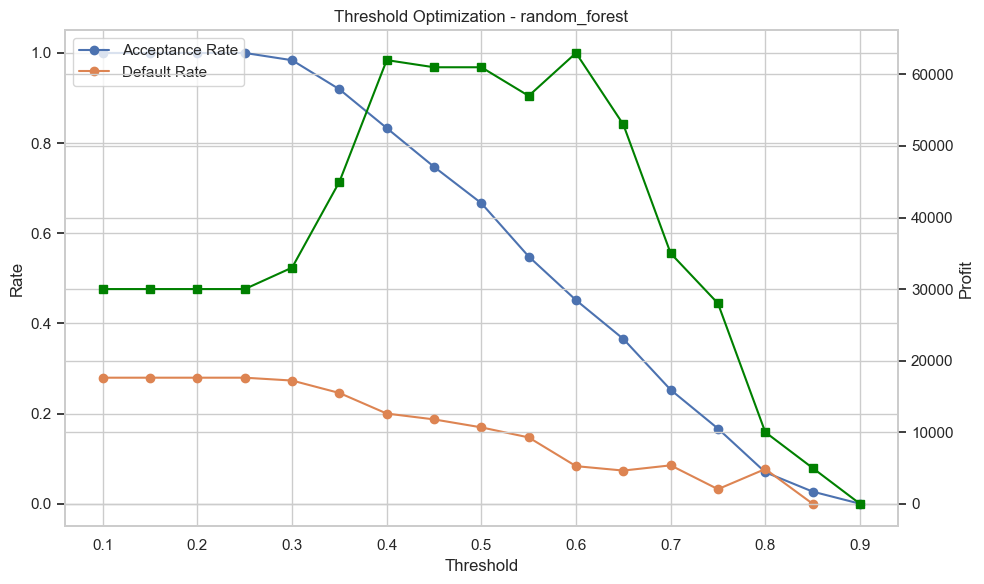


Threshold Optimization Results:
    Threshold  Acceptance Rate  Default Rate  Profitability  Loss Rate
0        0.10            1.000         0.280          30000      0.559
1        0.15            1.000         0.280          30000      0.559
2        0.20            1.000         0.280          30000      0.559
3        0.25            1.000         0.280          30000      0.559
4        0.30            0.984         0.273          33000      0.546
5        0.35            0.919         0.246          45000      0.491
6        0.40            0.833         0.200          62000      0.400
7        0.45            0.747         0.187          61000      0.374
8        0.50            0.667         0.169          61000      0.339
9        0.55            0.548         0.147          57000      0.294
10       0.60            0.452         0.083          63000      0.167
11       0.65            0.366         0.074          53000      0.147
12       0.70            0.253         0.085

In [41]:
# Visualization

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot Acceptance & Default Rate
ax1.plot(df_results["Threshold"], df_results["Acceptance Rate"], label="Acceptance Rate", marker="o")
ax1.plot(df_results["Threshold"], df_results["Default Rate"], label="Default Rate", marker="o")
ax1.set_ylabel("Rate")
ax1.set_xlabel("Threshold")
ax1.legend(loc="upper left")

# Plot Profitability on second axis
ax2 = ax1.twinx()
ax2.plot(df_results["Threshold"], df_results["Profitability"], label="Profitability", color="green", marker="s")
ax2.set_ylabel("Profit")

# Add title
plt.title(f"Threshold Optimization - {best_model_name}")
fig.tight_layout()
plt.show()

# Show table of results
print("\nThreshold Optimization Results:")
print(df_results.round(3))

In [42]:
# Recommended Threshold Finder

# Strategy 1: Maximize Profitability
best_profit_idx = df_results["Profitability"].idxmax()
best_profit_threshold = df_results.loc[best_profit_idx, "Threshold"]

# Strategy 2: Constrain Default Rate ≤ 10% (if possible)
df_safe = df_results[df_results["Default Rate"] <= 0.10]
if not df_safe.empty:
    best_safe_idx = df_safe["Profitability"].idxmax()
    best_safe_threshold = df_results.loc[best_safe_idx, "Threshold"]
else:
    best_safe_threshold = None

print("\n🎯 Recommended Thresholds:")
print(f"Threshold (Max Profit): {best_profit_threshold:.2f}")
if best_safe_threshold:
    print(f"Threshold (Max Profit, Default ≤ 10%): {best_safe_threshold:.2f}")
else:
    print("No threshold satisfies Default Rate ≤ 10%")



🎯 Recommended Thresholds:
Threshold (Max Profit): 0.60
Threshold (Max Profit, Default ≤ 10%): 0.60


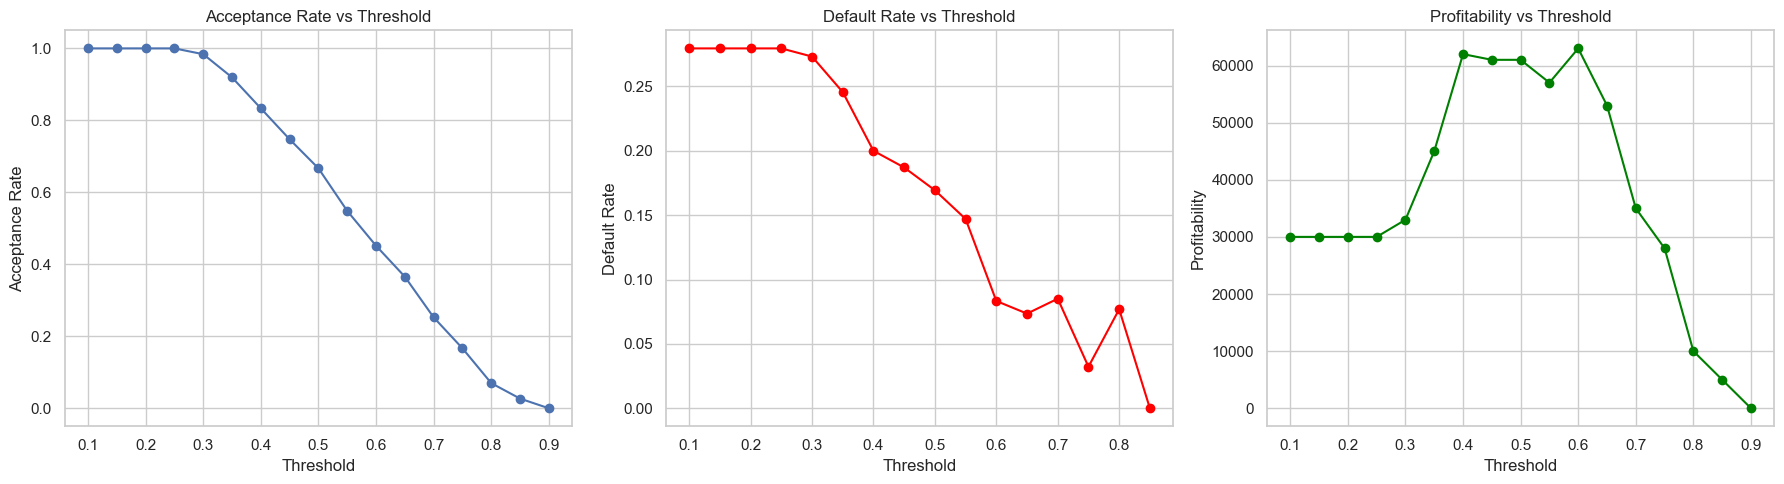


💰 Best threshold for profit = 0.60 (Profit = 63000)


In [43]:
# Plot Trade-offs

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(df_results["Threshold"], df_results["Acceptance Rate"], marker="o")
axes[0].set_title("Acceptance Rate vs Threshold")
axes[0].set_xlabel("Threshold")
axes[0].set_ylabel("Acceptance Rate")

axes[1].plot(df_results["Threshold"], df_results["Default Rate"], marker="o", color="red")
axes[1].set_title("Default Rate vs Threshold")
axes[1].set_xlabel("Threshold")
axes[1].set_ylabel("Default Rate")

axes[2].plot(df_results["Threshold"], df_results["Profitability"], marker="o", color="green")
axes[2].set_title("Profitability vs Threshold")
axes[2].set_xlabel("Threshold")
axes[2].set_ylabel("Profitability")

plt.tight_layout()
plt.show()

# Show best threshold by profit
best_t = df_results.loc[df_results["Profitability"].idxmax(), "Threshold"]
best_profit = df_results["Profitability"].max()
print(f"\n💰 Best threshold for profit = {best_t:.2f} (Profit = {best_profit})")


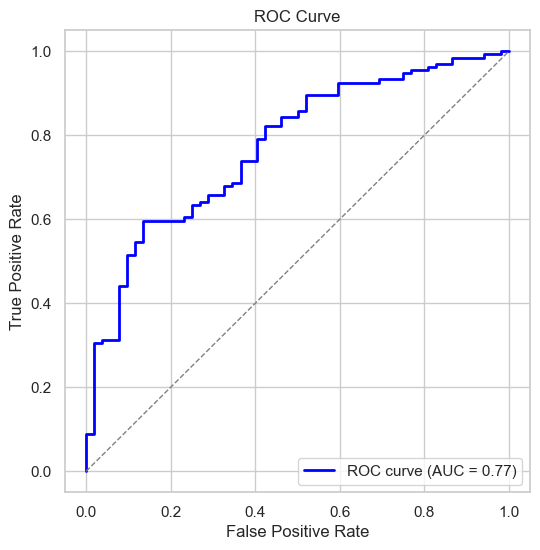

In [44]:
# ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
y_test_numeric = y_test.astype(int)
fpr, tpr, roc_thresholds = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


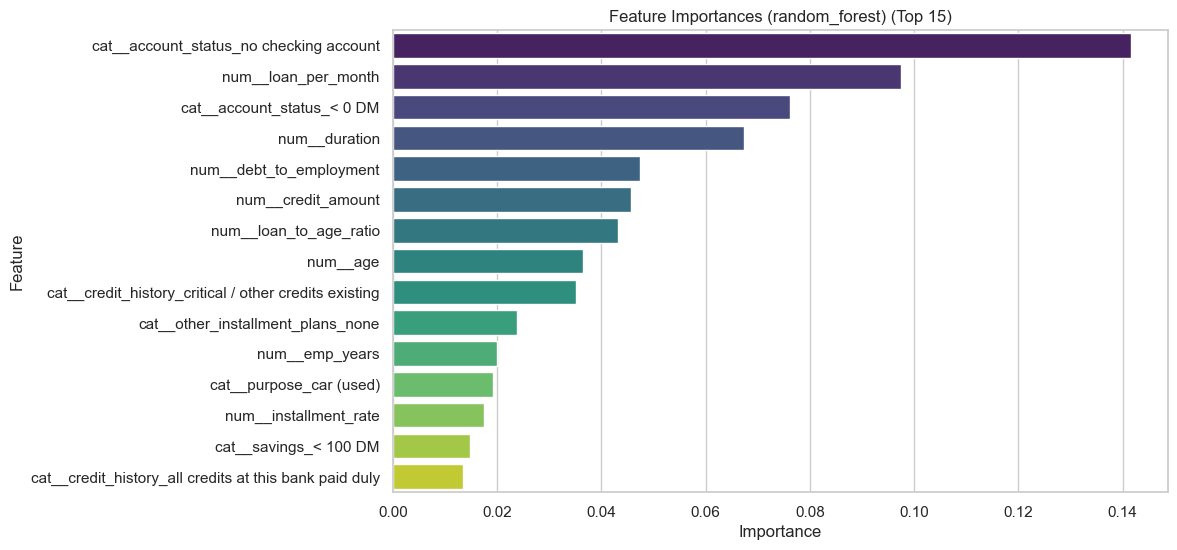


🔎 Top 10 features driving model decisions:
                                              Feature  Importance
20            cat__account_status_no checking account    0.141605
7                                 num__loan_per_month    0.097443
18                         cat__account_status_< 0 DM    0.076148
0                                       num__duration    0.067273
14                            num__debt_to_employment    0.047439
1                                  num__credit_amount    0.045598
8                              num__loan_to_age_ratio    0.043183
4                                            num__age    0.036396
22  cat__credit_history_critical / other credits e...    0.035201
58                  cat__other_installment_plans_none    0.023809


In [45]:
# Feature Importance / Coefficients

importances = None
feature_names = (
    best_model.best_estimator_.named_steps["preprocess"]
    .get_feature_names_out()
)

final_model = best_model.best_estimator_.named_steps["model"]

# Case 1: Logistic Regression
if isinstance(final_model, LogisticRegression):
    importances = final_model.coef_[0]
    title = "Feature Coefficients (Logistic Regression)"
    importance_type = "Coefficient"

# Case 2: Tree-based models
elif hasattr(final_model, "feature_importances_"):
    importances = final_model.feature_importances_
    title = f"Feature Importances ({best_model_name})"
    importance_type = "Importance"

# Plot if importances found
if importances is not None:
    fi_df = pd.DataFrame({
        "Feature": feature_names,
        importance_type: importances
    }).sort_values(by=importance_type, ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x=importance_type, y="Feature", data=fi_df.head(15), palette="viridis")
    plt.title(title + " (Top 15)")
    plt.show()

    print("\n🔎 Top 10 features driving model decisions:")
    print(fi_df.head(10))
